In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


# Try opening with utf-8 encoding
try:
    df = pd.read_csv('data/life_avg.csv', encoding='utf-8')
except UnicodeDecodeError:
    # If error, try with cp949 encoding
    df = pd.read_csv('data/life_avg.csv', encoding='cp949')
print(df)

      지표연도 적용기간  성별       시도   시군구  평균 기대수명  보험료1분위  보험료2분위  보험료3분위  보험료4분위   
0     2004   1년  전체       전국    전체    78.98   75.52   78.45   79.28   80.12  \
1     2004   1년  남성       전국    전체    75.37   71.09   74.77   75.71   76.98   
2     2004   1년  여성       전국    전체    82.25   80.08   81.84   82.50   82.79   
3     2005   1년  전체       전국    전체    79.42   75.78   79.04   79.57   80.70   
4     2005   1년  남성       전국    전체    75.90   71.50   75.41   76.24   77.61   
...    ...  ...  ..      ...   ...      ...     ...     ...     ...     ...   
9877  2020   6년  남성  제주특별자치도   제주시    80.53   74.42   81.59   81.41   83.07   
9878  2020   6년  여성  제주특별자치도   제주시    87.48   83.21   87.85   88.55   88.78   
9879  2020   6년  전체  제주특별자치도  서귀포시    84.43   78.70   84.31   85.99   86.35   
9880  2020   6년  남성  제주특별자치도  서귀포시    80.20   73.99   80.30   82.29   82.32   
9881  2020   6년  여성  제주특별자치도  서귀포시    88.41   83.98   88.31   88.86   89.82   

      보험료5분위  기대수명격차  
0      82.03    6.50  
1    

In [19]:
df = df.rename(columns={'지표연도': 'year', '시군구': 'City', '시도':'District', '평균 기대수명' : 'AVG'})
df = df[df['성별'] == '전체']
df = df[['City', 'year', 'District', 'AVG']]
df = df[df['City'] != '전체']
df = df[(df['year'] >= 2015) & (df['year'] <= 2020)]

print(df)
#df.to_csv('AVG_City.csv', index=False)

      City  year District    AVG
105    종로구  2015    서울특별시  83.95
108    종로구  2016    서울특별시  84.26
111    종로구  2017    서울특별시  84.75
114    종로구  2018    서울특별시  84.90
117    종로구  2019    서울특별시  85.31
...    ...   ...      ...    ...
9864   함양군  2020     경상남도  83.24
9867   거창군  2020     경상남도  83.22
9870   합천군  2020     경상남도  81.97
9876   제주시  2020  제주특별자치도  84.36
9879  서귀포시  2020  제주특별자치도  84.43

[1516 rows x 4 columns]


In [20]:
cities = ['부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '서울특별시']

for city in cities:
    # 광역시의 평균값 계산
    city_avg_df = df[df['District'] == city].groupby('year')['AVG'].mean().reset_index()

    # 해당 광역시 행 삭제
    df = df[df['District'] != city]

    # 광역시 평균값 행 추가
    for index, row in city_avg_df.iterrows():
        new_row = pd.DataFrame({'City':city, 'year':row['year'], 'District':city, 'AVG':row['AVG']}, index=[0])
        df = pd.concat([df, new_row], ignore_index=True)
df['year'] = df['year'].astype(int)
df['AVG'] = df['AVG'].round(2)

print(df)
df.to_csv('AVG_City3.csv', index=False)

       City  year District    AVG
0       세종시  2015  세종특별자치시  82.34
1       세종시  2016  세종특별자치시  82.83
2       세종시  2017  세종특별자치시  83.27
3       세종시  2018  세종특별자치시  83.44
4       세종시  2019  세종특별자치시  83.86
...     ...   ...      ...    ...
1109  서울특별시  2016    서울특별시  84.21
1110  서울특별시  2017    서울특별시  84.54
1111  서울특별시  2018    서울특별시  84.82
1112  서울특별시  2019    서울특별시  85.14
1113  서울특별시  2020    서울특별시  85.41

[1114 rows x 4 columns]


In [21]:
df3 = pd.read_csv('data/AVG_City4.csv', encoding='utf-8')
import numpy as np

# City와 year이 전부 같은 행들을 찾고 AVG 컬럼의 평균값으로 대체
df2 = df3.groupby(['City', 'year']).agg({'District':'first', 'AVG':'mean'}).reset_index()

print(df.to_string(index=False))

FileNotFoundError: [Errno 2] No such file or directory: 'data/AVG_City4.csv'

In [22]:
df2 = pd.read_csv('data/pollute_year.csv', encoding='utf-8')

print(df2)

     District City  year    pm25    pm10    so2     o3    no2     co
0         강원도   강릉  2015  19.750  48.583  0.004  0.030  0.012  0.467
1         강원도   강릉  2016  27.250  47.250  0.003  0.030  0.014  0.483
2         강원도   강릉  2017  24.667  43.667  0.003  0.031  0.012  0.425
3         강원도   강릉  2018  19.500  35.000  0.003  0.034  0.013  0.325
4         강원도   강릉  2019  18.091  35.455  0.002  0.037  0.012  0.309
...       ...  ...   ...     ...     ...    ...    ...    ...    ...
1299     충청북도   충주  2018  26.000  48.667  0.004  0.025  0.023  0.467
1300     충청북도   충주  2019  27.083  44.167  0.003  0.026  0.022  0.517
1301     충청북도   충주  2020  19.667  36.833  0.003  0.028  0.015  0.450
1302     충청북도   충주  2021  18.000  36.250  0.002  0.030  0.014  0.458
1303     충청북도   충주  2022  19.455  33.455  0.002  0.030  0.014  0.436

[1304 rows x 9 columns]


In [ ]:
import pandas as pd

df = pd.read_excel('data/AVG_Data_City.xlsx')


df_grouped = df.groupby(['City', 'year']).agg({'AVG': 'mean', 'District': 'first'}).reset_index()

df_final = pd.merge(df.drop('AVG', axis=1), df_grouped, on=['City', 'year', 'District'])


df_final = df_final.drop_duplicates()
df_final['AVG'] = df_final['AVG'].round(2)

df_final.to_csv('UPDATED_AVG_Data.csv', index=False)
print(df_final)

         City  year District    AVG
0     세종특별자치시  2015  세종특별자치시  82.34
1     세종특별자치시  2016  세종특별자치시  82.83
2     세종특별자치시  2017  세종특별자치시  83.27
3     세종특별자치시  2018  세종특별자치시  83.44
4     세종특별자치시  2019  세종특별자치시  83.86
...       ...   ...      ...    ...
1103    서울특별시  2016    서울특별시  84.21
1104    서울특별시  2017    서울특별시  84.54
1105    서울특별시  2018    서울특별시  84.82
1106    서울특별시  2019    서울특별시  85.14
1107    서울특별시  2020    서울특별시  85.41

[973 rows x 4 columns]


In [ ]:
df_pollute = pd.read_csv('data/pollute_year.csv')
merged_df = df_pollute.merge(df_final[['City', 'year', 'AVG']], on=['City', 'year'], how='left')
merged_df['AVG'] = merged_df['AVG'].fillna(0)
merged_df = merged_df.dropna()
merged_df = merged_df.dropna().drop(merged_df[merged_df['AVG'] == 0.00].index)
print(merged_df)
merged_df.to_csv('pollution_life_without0.csv', index=False)


     District City  year    pm25    pm10    so2     o3    no2     co    AVG
0         강원도   강릉  2015  19.750  48.583  0.004  0.030  0.012  0.467  82.11
1         강원도   강릉  2016  27.250  47.250  0.003  0.030  0.014  0.483  82.56
2         강원도   강릉  2017  24.667  43.667  0.003  0.031  0.012  0.425  82.94
3         강원도   강릉  2018  19.500  35.000  0.003  0.034  0.013  0.325  83.16
4         강원도   강릉  2019  18.091  35.455  0.002  0.037  0.012  0.309  83.44
...       ...  ...   ...     ...     ...    ...    ...    ...    ...    ...
1297     충청북도   충주  2016  24.083  44.583  0.003  0.026  0.022  0.458  81.72
1298     충청북도   충주  2017  26.250  44.500  0.003  0.028  0.022  0.450  81.97
1299     충청북도   충주  2018  26.000  48.667  0.004  0.025  0.023  0.467  82.12
1300     충청북도   충주  2019  27.083  44.167  0.003  0.026  0.022  0.517  82.49
1301     충청북도   충주  2020  19.667  36.833  0.003  0.028  0.015  0.450  82.74

[628 rows x 10 columns]


In [16]:
df_poll = pd.read_csv('data/pollute_year.csv')
df_poll = df_poll.dropna()
print(df_poll)
print(df_poll.dtypes)

     District City  year    pm25    pm10    so2     o3    no2     co
0         강원도   강릉  2015  19.750  48.583  0.004  0.030  0.012  0.467
1         강원도   강릉  2016  27.250  47.250  0.003  0.030  0.014  0.483
2         강원도   강릉  2017  24.667  43.667  0.003  0.031  0.012  0.425
3         강원도   강릉  2018  19.500  35.000  0.003  0.034  0.013  0.325
4         강원도   강릉  2019  18.091  35.455  0.002  0.037  0.012  0.309
...       ...  ...   ...     ...     ...    ...    ...    ...    ...
1299     충청북도   충주  2018  26.000  48.667  0.004  0.025  0.023  0.467
1300     충청북도   충주  2019  27.083  44.167  0.003  0.026  0.022  0.517
1301     충청북도   충주  2020  19.667  36.833  0.003  0.028  0.015  0.450
1302     충청북도   충주  2021  18.000  36.250  0.002  0.030  0.014  0.458
1303     충청북도   충주  2022  19.455  33.455  0.002  0.030  0.014  0.436

[954 rows x 9 columns]
District     object
City         object
year          int64
pm25        float64
pm10        float64
so2         float64
o3          float64
no2     

Linear Regression MSE: 0.012970093705496693, R2: 0.33629981770017936
Multiple Regression MSE: 0.012970093705496693, R2: 0.33629981770017936


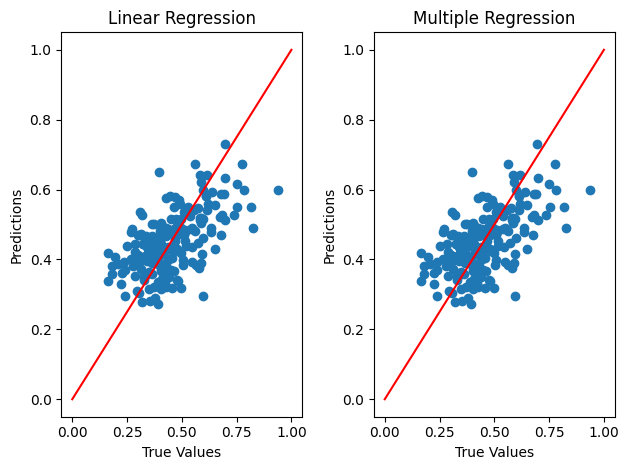

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
df = pd.read_csv('pollution_life_without0.csv')

# 원-핫 인코딩
encoded_df = pd.get_dummies(df, columns=['District'], dtype=int)


# pollution min,max,avg 나눠서 해보기
# level 나눠섯
# 데이터 준비
X = encoded_df[['pm25', 'pm10', 'o3', 'no2', 'co']]
y = encoded_df['AVG']
Districts = ['District_강원도', 'District_경기도',  'District_경상남도', 'District_경상북도', 'District_광주광역시',  'District_대구광역시',  'District_대전광역시',  'District_부산광역시',  'District_서울특별시', 'District_세종특별자치시',  'District_울산광역시',  'District_인천광역시',  'District_전라남도', 
             'District_전라북도',  'District_제주특별자치도',  'District_충청남도',  'District_충청북도'   ]

# Standard Scaling for X
scaler_x = StandardScaler()
X_scaled = scaler_x.fit_transform(X)

# Concatenate Districts with X_scaled
X_scaled_with_districts = encoded_df[Districts].copy()
X_scaled_with_districts[X.columns] = X_scaled

# MinMax Scaling for y
scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1,1))

# Train/Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X_scaled_with_districts, y_scaled, test_size=0.3, random_state=0)

# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# Multiple Linear Regression
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)

# 성능 평가
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)

print(f"Linear Regression MSE: {mse_linear}, R2: {r2_linear}")
print(f"Multiple Regression MSE: {mse_multiple}, R2: {r2_multiple}")

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_linear)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression")
plt.plot([0, 1], [0, 1], color='red')

# Scatter plot for Multiple Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_multiple)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Multiple Regression")
plt.plot([0, 1], [0, 1], color='red')

plt.tight_layout()
plt.show()
